<a href="https://colab.research.google.com/github/atta007/Video-Classification/blob/master/Video_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

Using TensorFlow backend.


In [0]:
from google.colab import files
uploaded = files.upload()

Saving Tom and Jerry 3.mp4 to Tom and Jerry 3.mp4


In [0]:
!cp Tom and jerry.mp4


cp: target 'jerry.mp4' is not a directory


In [0]:
count = 0
videoFile = "Tom and jerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1

while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        print(filename)

        cv2.imwrite(filename, frame)
cap.release()




frame0.jpg
frame1.jpg
frame2.jpg
frame3.jpg
frame4.jpg
frame5.jpg
frame6.jpg
frame7.jpg
frame8.jpg
frame9.jpg
frame10.jpg
frame11.jpg
frame12.jpg
frame13.jpg
frame14.jpg
frame15.jpg
frame16.jpg
frame17.jpg
frame18.jpg
frame19.jpg
frame20.jpg
frame21.jpg
frame22.jpg
frame23.jpg
frame24.jpg
frame25.jpg
frame26.jpg
frame27.jpg
frame28.jpg
frame29.jpg
frame30.jpg
frame31.jpg
frame32.jpg
frame33.jpg
frame34.jpg
frame35.jpg
frame36.jpg
frame37.jpg
frame38.jpg
frame39.jpg
frame40.jpg
frame41.jpg
frame42.jpg
frame43.jpg
frame44.jpg
frame45.jpg
frame46.jpg
frame47.jpg
frame48.jpg
frame49.jpg
frame50.jpg
frame51.jpg
frame52.jpg
frame53.jpg
frame54.jpg
frame55.jpg
frame56.jpg
frame57.jpg
frame58.jpg
frame59.jpg
frame60.jpg
frame61.jpg
frame62.jpg
frame63.jpg
frame64.jpg
frame65.jpg
frame66.jpg
frame67.jpg
frame68.jpg
frame69.jpg
frame70.jpg
frame71.jpg
frame72.jpg
frame73.jpg
frame74.jpg
frame75.jpg
frame76.jpg
frame77.jpg
frame78.jpg
frame79.jpg
frame80.jpg
frame81.jpg
frame82.jpg
frame83.jpg
fr

In [0]:
!ls  

 1_DcwBhYo15j7AU-v2gN61qGGd1ZablGK   frame21.jpg   frame3.jpg
 frame0.jpg			     frame22.jpg   frame4.jpg
 frame10.jpg			     frame23.jpg   frame5.jpg
 frame11.jpg			     frame24.jpg   frame6.jpg
 frame12.jpg			     frame25.jpg   frame7.jpg
 frame13.jpg			     frame26.jpg   frame8.jpg
 frame14.jpg			     frame27.jpg   frame9.jpg
 frame15.jpg			     frame28.jpg   mapping_Tom_Jerry.csv
 frame16.jpg			     frame29.jpg   sample_data
 frame17.jpg			     frame2.jpg   'Tom and jerry (1).mp4'
 frame18.jpg			     frame30.jpg  'Tom and jerry.mp4'
 frame19.jpg			     frame31.jpg   view
 frame1.jpg			     frame32.jpg
 frame20.jpg			     frame33.jpg


(-0.5, 1279.5, 719.5, -0.5)

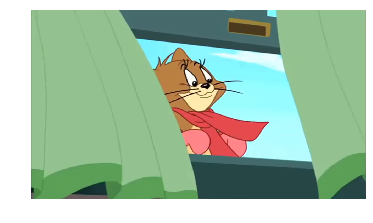

In [0]:
img = plt.imread('frame0.jpg')   # reading image using its name
plt.imshow(img)
plt.axis("off")

In [0]:
data = pd.read_csv('mapping_Tom_Jerry.csv')     # reading the csv file
data.head(7)      # printing first 7 rows of the file


,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2
5,frame5.jpg,2
6,frame6.jpg,2


In [0]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
    
    
X = np.array(X)    # converting list to array

In [0]:
y = data.Class
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [0]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [0]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf')      # preprocessing the input data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set

In [0]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [0]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 4s 0us/step


In [0]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

((208, 7, 7, 512), (90, 7, 7, 512))

In [0]:
X_train = X_train.reshape(208, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(90, 7*7*512)

In [0]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [0]:
# i. Building the model
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(3, activation='softmax'))    # output layer

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________


In [0]:
# ii. Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from keras.callbacks import EarlyStopping
from tensorboardcolab import *
tbc = TensorBoardColab()
es = EarlyStopping(monitor = "val_loss", patience = 10)

Wait for 8 seconds...
TensorBoard link:
http://83c234a8.ngrok.io


In [0]:
# iii. Training the model
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid),  callbacks = [es, TensorBoardColabCallback(tbc)])

Train on 208 samples, validate on 90 samples
Epoch 1/100
208/208 [==============================] - 0s 2ms/step - loss: 0.0162 - acc: 0.9904 - val_loss: 0.3504 - val_acc: 0.8556
Epoch 2/100
208/208 [==============================] - 0s 1ms/step - loss: 0.0148 - acc: 0.9904 - val_loss: 0.3955 - val_acc: 0.8556
Epoch 3/100
208/208 [==============================] - 0s 1ms/step - loss: 0.0081 - acc: 0.9952 - val_loss: 0.3859 - val_acc: 0.8556
Epoch 4/100
208/208 [==============================] - 0s 1ms/step - loss: 0.0073 - acc: 0.9952 - val_loss: 0.5147 - val_acc: 0.8556
Epoch 5/100
208/208 [==============================] - 0s 1ms/step - loss: 0.0113 - acc: 0.9952 - val_loss: 0.4356 - val_acc: 0.8667
Epoch 6/100
208/208 [==============================] - 0s 1ms/step - loss: 0.0264 - acc: 0.9952 - val_loss: 0.4353 - val_acc: 0.8667
Epoch 7/100
208/208 [==============================] - 0s 2ms/step - loss: 0.0143 - acc: 0.9952 - val_loss: 0.8334 - val_acc: 0.8222
Epoch 8/100
208/208 [===

In [0]:
!ls

'1_DcwBhYo15j7AU-v2gN61qGGd1ZablGK?e=download'	 frame236.jpg
 Data						 frame237.jpg
 data.tar					 frame238.jpg
 frame0.jpg					 frame239.jpg
 frame100.jpg					 frame23.jpg
 frame101.jpg					 frame240.jpg
 frame102.jpg					 frame241.jpg
 frame103.jpg					 frame242.jpg
 frame104.jpg					 frame243.jpg
 frame105.jpg					 frame244.jpg
 frame106.jpg					 frame245.jpg
 frame107.jpg					 frame246.jpg
 frame108.jpg					 frame247.jpg
 frame109.jpg					 frame248.jpg
 frame10.jpg					 frame249.jpg
 frame110.jpg					 frame24.jpg
 frame111.jpg					 frame250.jpg
 frame112.jpg					 frame251.jpg
 frame113.jpg					 frame252.jpg
 frame114.jpg					 frame253.jpg
 frame115.jpg					 frame254.jpg
 frame116.jpg					 frame255.jpg
 frame117.jpg					 frame256.jpg
 frame118.jpg					 frame257.jpg
 frame119.jpg					 frame258.jpg
 frame11.jpg					 frame259.jpg
 frame120.jpg					 frame25.jpg
 frame121.jpg					 frame260.jpg
 frame122.jpg					 frame261.jpg
 frame123.jpg					 frame262.jpg
 frame124.jpg					 frame263.j

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test(1).csv to test(1).csv


In [0]:
!ls

'1_DcwBhYo15j7AU-v2gN61qGGd1ZablGK?e=download'	 frame237.jpg
 Data						 frame238.jpg
 data.tar					 frame239.jpg
 frame0.jpg					 frame23.jpg
 frame100.jpg					 frame240.jpg
 frame101.jpg					 frame241.jpg
 frame102.jpg					 frame242.jpg
 frame103.jpg					 frame243.jpg
 frame104.jpg					 frame244.jpg
 frame105.jpg					 frame245.jpg
 frame106.jpg					 frame246.jpg
 frame107.jpg					 frame247.jpg
 frame108.jpg					 frame248.jpg
 frame109.jpg					 frame249.jpg
 frame10.jpg					 frame24.jpg
 frame110.jpg					 frame250.jpg
 frame111.jpg					 frame251.jpg
 frame112.jpg					 frame252.jpg
 frame113.jpg					 frame253.jpg
 frame114.jpg					 frame254.jpg
 frame115.jpg					 frame255.jpg
 frame116.jpg					 frame256.jpg
 frame117.jpg					 frame257.jpg
 frame118.jpg					 frame258.jpg
 frame119.jpg					 frame259.jpg
 frame11.jpg					 frame25.jpg
 frame120.jpg					 frame260.jpg
 frame121.jpg					 frame261.jpg
 frame122.jpg					 frame262.jpg
 frame123.jpg					 frame263.jpg
 frame124.jpg					 frame264.j

In [0]:
count = 0
videoFile = "Tom and Jerry 3.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [0]:
test = pd.read_csv('test(1).csv')

In [0]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [0]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [0]:
# preprocessing the images
test_image = preprocess_input(test_image, mode='tf')

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

# converting the images to 1-D form
test_image = test_image.reshape(186, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [0]:
predictions = model.predict_classes(test_image)

In [0]:
print("The screen time of JERRY is", predictions[predictions==1].shape[0], "seconds")
print("The screen time of TOM is", predictions[predictions==2].shape[0], "seconds")

The screen time of JERRY is 6 seconds
The screen time of TOM is 119 seconds
